# Ajuste de curvas

* Regressão linear por mínimos quadrados
* Análise (erro-padrão, coeficiente de correlação)

# Motivação

Nesta seção veremos como analisar a qualidade de uma regressão linear.

Lembrando que temos um problema do tipo:

\begin{equation}
y = \theta_1x + \theta_0
\end{equation}

onde $x$ é a *variável independente ou preditora*, $y$ a *variável alvo ou dependente*, $\theta_1$ e $\theta_0$ são os parâmetros do modelo.

O resíduo é dado por:

\begin{equation}
e_i = y_i - y(x_i)
\end{equation}

a pergunta que precisamos responder é: 

<div class="alert alert-block alert-warning">
Quão bom é o modelo que escolhemos?
</div>

# Exemplo

Suponha que tenhamos os seguintes dados:

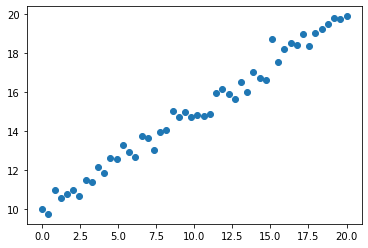

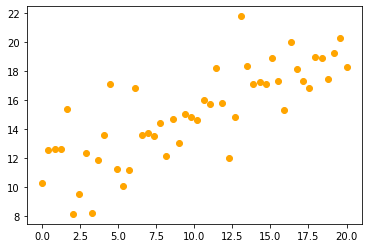

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

theta1 = 0.5
theta0 = 10

X = np.linspace(0,20)
Y1 = [x * theta1 + theta0 + random.gauss(0, 0.5) for x in X ]
Y2 = [x * theta1 + theta0 + random.gauss(0, 2) for x in X ]

plt.scatter(X, Y1)
plt.figure()
plt.scatter(X, Y2, c='orange')

## Coeficiente de determinação R-quadrado

Uma forma de avaliar o ajuste de um modelo linear é utilizando a métrica $R ^2$.

Ele é calculado a partir de duas somas:

\begin{equation}
SQtot = \sum\limits_{i=1}^n (y_i - \bar{y})^2
\end{equation}

e

\begin{equation}
SQexp = \sum\limits_{i=1}^n (\hat{y_i} - \bar{y})^2
\end{equation}

onde $\hat{y_i} = y(x_i)$ é o valor calculado pelo modelo.

A métrica $R^2$ é calculada como:

\begin{equation}
R^2 = \dfrac{SQexp}{SQtot}
\end{equation}


que também pode ser reescrita em termos da somatória dos resíduos como:

\begin{equation}
R^2 = \dfrac{SQtot - SQres}{SQtot}
\end{equation}


0.5002437016455007 9.98715471040405 0.43029757611180136 10.771534451110618


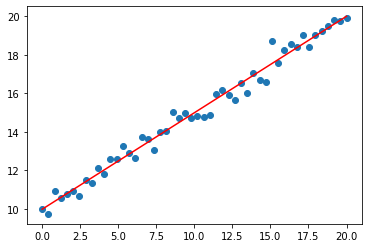

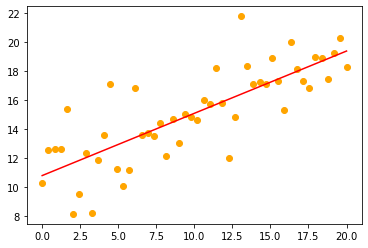

In [3]:
from scipy import stats

res = stats.linregress(X, Y1)
m1_theta1, m1_theta0 = res.slope, res.intercept

plt.scatter(X, Y1)
plt.plot(X, X*m1_theta1 + m1_theta0, 'r')

res = stats.linregress(X, Y2)
m2_theta1, m2_theta0 = res.slope, res.intercept

plt.figure()
plt.scatter(X, Y2, c='orange')
plt.plot(X, X*m2_theta1 + m2_theta0, 'r')

print(m1_theta1, m1_theta0, m2_theta1, m2_theta0)

In [4]:
# soma total dos quadrados
SQT = np.sum((Y1 - np.mean(Y1))**2)

# soma dos quadrados dos resíduos
Y1hat = X*m1_theta1 + m1_theta0
SQR = np.sum((Y1 - Y1hat)**2)

R2 = (SQT - SQR)/SQT
print(R2)

# soma total dos quadrados
SQT = np.sum((Y2 - np.mean(Y2))**2)

# soma dos quadrados dos resíduos
Y2hat = X*m2_theta1 + m2_theta0
SQR = np.sum((Y2 - Y2hat)**2)

R2 = (SQT - SQR)/SQT
print(R2)

0.9823696101911685
0.6272014485620986


In [6]:
import statsmodels.api as sm
import numpy as np

X1 = sm.add_constant(X)

mod1 = sm.OLS(Y1, X1).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     2675.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           9.40e-44
Time:                        17:56:36   Log-Likelihood:                -24.469
No. Observations:                  50   AIC:                             52.94
Df Residuals:                      48   BIC:                             56.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9872      0.112     88.964      0.0